# <p style="text-align: center;">MIS 382N: Advanced Machine Learning</p>
# <p style="text-align: center;">Homework 5 <br> (Finally the final homework this semester, yay!) </p>
## <p style="text-align: center;">Total points: 55 </p>
## <p style="text-align: center;">Due: Monday, **Nov 29th** submitted via Canvas by 11:59 pm</p>

Your homework should be written in a **Jupyter notebook**. Please make sure your code runs and the graphics (and anything else) are displayed in your notebook before submitting (%matplotlib inline). 

**Note: Notebooks MUST have the images embedded in them. There will be no regrades if attached images do not render in the notebook. Please re download from canvas after submission and make sure all attached images render without errors. (Hint: Image module from IPython.display)**

**This can be an individual assignment or group of 2. If you choose to do it as a group, please specify who you are working with (name and EID), then only one student should submit the homework. Put your name and eid here.**

Name: Archit Patel

EID:

Name: Vivek Mehendiratta

EID: vm24395

# Question 1: Ensembles Conceptual (5 pts)
Briefly describe the concepts of Gradient Boosting in your own words. How does it differ from Adaboost?

## Answer:

### Gradient Boosting :

It is an additive model where trees are added one at a time, and existing trees in the model are not changed.

A gradient descent procedure is used to minimize the loss when adding trees.

Traditionally, gradient descent is used to minimize a set of parameters, such as the coefficients in a regression equation or weights in a neural network. After calculating error or loss, the weights are updated to minimize that error.

Instead of parameters, we have weak learners or more specifically decision trees. After calculating the loss, to perform the gradient descent procedure, we must add a tree to the model that reduces the loss. We do this by parameterizing the tree, then modify the parameters of the tree and move in the right direction by (reducing the residual loss).

Generally this approach is called functional gradient descent or gradient descent with functions.

The output for the new tree is then added to the output of the existing sequence of trees in an effort to correct or improve the final output of the model.

A fixed number of trees are added or training stops once loss reaches an acceptable level or no longer improves on an external validation dataset.

### Difference between Gradient Boosting and Adaboost

1. **AdaBoost** : 
    - At each iteration, adaptive boosting changes the sample distribution by modifying the weights attached to each of the instances. It increases the weights of the wrongly predicted instances and decreases the ones of the correctly predicted instances. The weak learner thus focuses more on the difficult instances. After being trained, the weak learner is added to the strong one according to his performance (so-called alpha weight). The higher it performs, the more it contributes to the strong learner.
    
    - Adaboost doesn't overfit because it is more about 'organizing people to vote' than 'voting'. In fact, if you have a gradient boosting model, you can use it in adaboost along with other models.


2. **Gradient Boosting** : 
    - Gradient boosting doesn't modify the sample distribution. Instead of training on a newly sample distribution, the weak learner trains on the remaining errors (so-called pseudo-residuals) of the strong learner. It is another way to give more importance to the difficult instances. At each iteration, the pseudo-residuals are computed and a weak learner is fitted to these pseudo-residuals. Then, the contribution of the weak learner (so-called multiplier) to the strong one isn't computed according to his performance on the newly distribution sample but using a gradient descent optimization process. The computed contribution is the one minimizing the overall error of the strong learner.
    - Gradient boosting calculate essentially the gradient of the loss function with respect to the prediction (instead of the features) and this way generates an extra 'helper prediction' to enhance the prediction and make the weak prediction closer and closer to y_test. So it can overfit.

# Question 2: SVM (25 pts)
Support Vector Machine (SVM) is a supervised machine learning algorithm that can be used for both classification and regression. In this problem, you will be playing with SVM on the sklearn wine dataset to explore the impacts of different parameters.

**a) (5 pts)** Implement the `train_model()` function. This function takes as input:

- X (the features)
- y (the labels)
- kernel (the specified kernel type, default value is `'linear'`)
- C (the penalty parameter, default value is 1
)
- gamma (the kernel coefficient, default value is 0.5). 

The `train_model()` function should fit a [svm.SVC](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html) model and return the trained model. After implementing `train_model()`, use the `plot_model()` function provided below to plot the results of your model.

**b) (10 pts)** The `kernel` parameter decides what form the input data will be transformed into, and may affect how your trained SVM model performs. In (a), the default value for `kernel` is `'linear'`, now re-train your svm model as you did in (a), but this time, use `'rbf'` as the `kernel`, while keeping `C=1, gamma=0.5` still. Use the provided `plot_model()` function to plot the results of your model. What do you observe?

**c) (10 pts)** The `'gamma'` is a hyper-parameter needed for `'rbf'` kernel, which specifies the width of the Gaussian Kernel. Now experiment with different gamma values `[0.5, 1, 10, 100]`, use `'rbf'` as the `kernel`, while keeping `C=1`. Train your SVM and use the provided `plot_model()` function to plot the results of your model. What do you observe from the plot as gamma increases? 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm, datasets
from sklearn.metrics import accuracy_score
%matplotlib inline

# load data
wine = datasets.load_wine()
# only take the first two features
X = wine.data[:, :2]
y = wine.target

In [2]:
def plot_model(X, y, svc, kernel='linear'):
# You don't need to implement this function, this has been implemented and is just for plotting the trained model.

# Input: 
#  - X: data features 
#  - y: the labels
#  - svc: the trained svm.SVC model
#  - kernel: specified kernel type, default value is 'linear'
    x0_min, x0_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
    x1_min, x1_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
    h = (x0_max / x0_min)/100
    xx0, xx1 = np.meshgrid(np.arange(x0_min, x0_max, h), np.arange(x1_min, x1_max, h))

    plt.subplot(1, 1, 1)
    y_pred = svc.predict(np.c_[xx0.ravel(), xx1.ravel()])
    y_pred = y_pred.reshape(xx0.shape)
    plt.contourf(xx0, xx1, y_pred, cmap=plt.cm.Paired, alpha=0.2)

    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired)
    plt.xlabel('Alcohol')
    plt.ylabel('Malic Acid')
    plt.xlim(xx0.min(), xx0.max())
    plt.title('SVC with {} kernel'.format(kernel))
    plt.show()

In [3]:
def train_model(X, y, kernel='linear', C=1, gamma=0.5):
    svc = svm.SVC(kernel=kernel, C=C, gamma=gamma)
    svc.fit(X, y)
    return svc

## Part A : `Linear` kernel

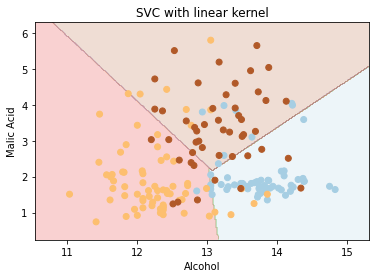

In [4]:
svc = train_model(X, y, kernel='linear', C=1, gamma=0.5)
plot_model(X, y, svc, kernel='linear')

## Part B: `rbf` kernel

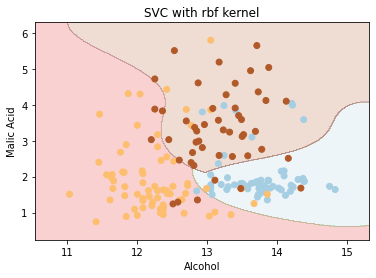

In [5]:
svc = train_model(X, y, kernel='rbf', C=1, gamma=0.5)
plot_model(X, y, svc, kernel='rbf')

## Observations : todo

## Part C : `Gamma` parameter multiple values

In [ ]:
gamma_list = [0.5, 1, 10, 100]

### Gamma : 0.5

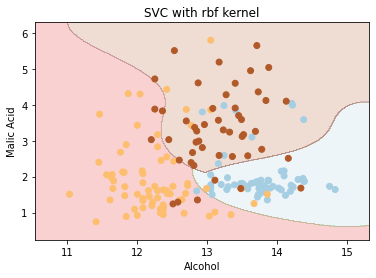

In [6]:
svc = train_model(X, y, kernel='rbf', C=1, gamma=0.5)
plot_model(X, y, svc, kernel='rbf')

### Gamma : 1

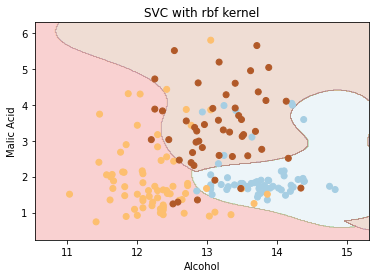

In [7]:
svc = train_model(X, y, kernel='rbf', C=1, gamma=1)
plot_model(X, y, svc, kernel='rbf')

### Gamma : 10

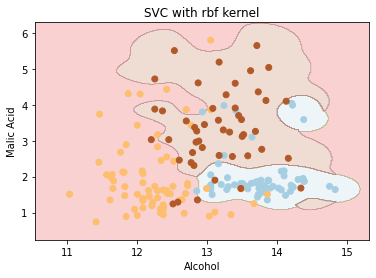

In [8]:
svc = train_model(X, y, kernel='rbf', C=1, gamma=10)
plot_model(X, y, svc, kernel='rbf')

### Gamma : 100

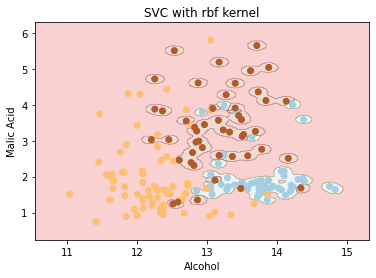

In [9]:
svc = train_model(X, y, kernel='rbf', C=1, gamma=100)
plot_model(X, y, svc, kernel='rbf')

## Observations : todo

# Question 3: Ensemble methods for classification (25 pts)

In this question, we will compare the performances of different ensemble methods for classification: Bagging, AdaBoost, GradientBoosting. 

The dataset used is [Spam Classification Data](https://archive.ics.uci.edu/ml/datasets/Spambase), which you can load from `spam_uci.csv` file. The last column represents the target label, where 1 means spam and 0 otherwise. You can use the provided codes to load the data and split training/test sets.

**a) (5 pts)** Fit a [Decision Tree Classifier](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html) with `random_state=10`,  and a [Logistic Regression Classifier](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html) with `random_state=10` and `solver="newton-cg"` for the spam classification problem. For each classifier, report the [accuracy_score](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html) and [roc_auc_score](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_auc_score.html#sklearn.metrics.roc_auc_score) on the test data. 
**Note**: Before computing roc_auc_score, you will need [`predict_proba(X_test)[:, 1]`](http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html#sklearn.ensemble.RandomForestClassifier.predict_proba) to obtain the predicted target scores first.


**b) (5 pts)** For **each** classifier in (a), use [Bagging](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.BaggingClassifier.html) to create an ensemble of 50 classifiers (i.e `n_estimators=50`) with `random_state=10`, report the accuracy_score and roc_auc_score on the test data. Compare the scores with what you obtained in (a), briefly describe the impact of Bagging on both classifiers.


**c) (5 pts)** Fit a [Random Forest Classifier](http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html) for the spam classification problem. Use [GridSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html) to find the best combination of hyperparameters from `{"n_estimators": [10, 100, 500], "criterion": ['gini', 'entropy'], "random_state": [42]}`. As what you did in (a), report the accuracy_score and roc_auc_score on the test data. 


**d) (6 pts)** Fit a [GradientBoosting Classifier](http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingClassifier.html), and an [AdaBoost Classifier](http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.AdaBoostClassifier.html#sklearn.ensemble.AdaBoostClassifier) for the spam classification problem. Use GridSearchCV to find the best combination of hyperparameters for each classifier: 
- For GradientBoosting, find the best combination from `{"n_estimators":[10, 100, 500], "learning_rate":[0.01, 0.1, 0.5], "max_depth":[3, 5, 10], "subsample":[0.5, 0.7, 1.0], "random_state":[42]}`;
- For AdaBoost, find the best combination from `{"n_estimators":[10, 100, 500], "learning_rate":[0.01, 0.1, 0.5], "random_state":[42]}`. 

Report the accuracy_score and roc_auc_score on the test data for each classifier. The GridSearchCV may take some time, especially for GradientBoostingClassifier.

**e) (4 pts)** In (c) and (d), you have obtained the best combination of hyperparameters respectively for Random Forest Classifier, Gradient Boosting Classifier and AdaBoost Classifier. 

Please use the best hyperparameters to initialize your classifiers, train your model, compute the accuracy_score and roc_auc_score on the test data, and plot the `accuracy_scores` of the three classifiers vs `n_estimators= [10, 100, 500]` in one plot, and plot the `roc_auc_scores` of the three classifiers vs `n_estimators= [10, 100, 500]` in another plot. That is, keep all other hyperparameters (except for `n_estimators`) as the best hyperparameters you obtained in (c) and (d), plot how the accuracy_score and roc_auc_score changes as you change the number of estimators (`n_estimators`).


In [10]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, roc_auc_score

data = pd.read_csv('spam_uci.csv', index_col=0)
print(data.shape)

X = data.iloc[:, :56]
y = data.iloc[:, 57]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

(4601, 58)


## Answer:

In [28]:
dt = DecisionTreeClassifier(random_state=10)
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)
print("Accuracy Score on X_train set")
print(accuracy_score(y_true=y_train, y_pred=dt.predict(X_train)))

print("Accuracy Score on X_test set")
print(accuracy_score(y_true=y_test, y_pred=y_pred_dt))

Accuracy Score on X_train set
0.9993510707332901
Accuracy Score on X_test set
0.9098090849242922


In [29]:
roc_auc_score(y_true=y_test, y_score=dt.predict_proba(X_test)[:,1])

0.9040453749567611

In [30]:
logreg = LogisticRegression(random_state=10, solver='newton-cg')
logreg.fit(X_train, y_train)
y_pred_logreg = logreg.predict(X_test)

print("Accuracy Score on X_train set")
print(accuracy_score(y_true=y_train, y_pred=logreg.predict(X_train)))

print("Accuracy Score on X_test set")
print(accuracy_score(y_true=y_test, y_pred=y_pred_logreg))

Accuracy Score on X_train set
0.9260220635950681
Accuracy Score on X_test set
0.9315339038841343


In [31]:
roc_auc_score(y_true=y_test, y_score=logreg.predict_proba(X_test)[:,1])

0.9734682742610166

## Part B : Bagging Classifier

In [37]:
bc = BaggingClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=50, random_state=10).fit(X_train, y_train)
y_pred_bc = bc.predict(X_test)
print("Accuracy Score on X_train set")
print(accuracy_score(y_true=y_train, y_pred=bc.predict(X_train)))

print("Accuracy Score on X_test set")
print(accuracy_score(y_true=y_test, y_pred=y_pred_bc))

Accuracy Score on X_train set
0.9990266060999351
Accuracy Score on X_test set
0.9368005266622779


In [38]:
roc_auc_score(y_true=y_test, y_score=bc.predict_proba(X_test)[:,1])

0.9796839729119637

In [39]:
bc = BaggingClassifier(base_estimator=LogisticRegression(), n_estimators=50, random_state=10).fit(X_train, y_train)
y_pred_bc = bc.predict(X_test)
print("Accuracy Score on X_train set")
print(accuracy_score(y_true=y_train, y_pred=bc.predict(X_train)))

print("Accuracy Score on X_test set")
print(accuracy_score(y_true=y_test, y_pred=y_pred_bc))

c:\users\mehen\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\users\mehen\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stab

c:\users\mehen\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\users\mehen\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stab

c:\users\mehen\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\users\mehen\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stab

Accuracy Score on X_train set
0.9266709928617781
Accuracy Score on X_test set
0.9315339038841343


c:\users\mehen\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [40]:
roc_auc_score(y_true=y_test, y_score=bc.predict_proba(X_test)[:,1])

0.9756649870372549

## Part C : Random Forest Classifier

In [56]:
param_grid = {"n_estimators": [10, 100, 500], "criterion": ['gini', 'entropy'], "random_state": [42]}

rf = RandomForestClassifier()

rf_grid = GridSearchCV(estimator=rf, param_grid=param_grid, verbose = 2, cv=5)

rf_grid.fit(X_train, y_train)

print("Best Params")
print(rf_grid.best_params_)

print("Accuracy Score on X_train set")
print(accuracy_score(y_true=y_train, y_pred=rf_grid.predict(X_train)))

print("Accuracy Score on X_test set")
print(accuracy_score(y_true=y_test, y_pred=rf_grid.predict(X_test)))

print("ROC AUC Score")
print(roc_auc_score(y_true=y_test, y_score=rf_grid.predict_proba(X_test)[:,1]))

Fitting 5 folds for each of 6 candidates, totalling 30 fits
[CV] END ...criterion=gini, n_estimators=10, random_state=42; total time=   0.0s
[CV] END ...criterion=gini, n_estimators=10, random_state=42; total time=   0.0s
[CV] END ...criterion=gini, n_estimators=10, random_state=42; total time=   0.0s
[CV] END ...criterion=gini, n_estimators=10, random_state=42; total time=   0.0s
[CV] END ...criterion=gini, n_estimators=10, random_state=42; total time=   0.0s
[CV] END ..criterion=gini, n_estimators=100, random_state=42; total time=   0.5s
[CV] END ..criterion=gini, n_estimators=100, random_state=42; total time=   0.5s
[CV] END ..criterion=gini, n_estimators=100, random_state=42; total time=   0.5s
[CV] END ..criterion=gini, n_estimators=100, random_state=42; total time=   0.5s
[CV] END ..criterion=gini, n_estimators=100, random_state=42; total time=   0.5s
[CV] END ..criterion=gini, n_estimators=500, random_state=42; total time=   2.7s
[CV] END ..criterion=gini, n_estimators=500, rand

## Gradient Boosting Classifier

In [57]:
param_grid = {"n_estimators":[10, 100, 500], "learning_rate":[0.01, 0.1, 0.5], "max_depth":[3, 5, 10], "subsample":[0.5, 0.7, 1.0], "random_state":[42]}

gbc = GradientBoostingClassifier()

gbc_grid = GridSearchCV(estimator=gbc, param_grid=param_grid, verbose = 2, cv=5)

gbc_grid.fit(X_train, y_train)

print("Best Params")
print(gbc_grid.best_params_)

print("Accuracy Score on X_train set")
print(accuracy_score(y_true=y_train, y_pred=gbc_grid.predict(X_train)))

print("Accuracy Score on X_test set")
print(accuracy_score(y_true=y_test, y_pred=gbc_grid.predict(X_test)))

print("ROC AUC Score")
print(roc_auc_score(y_true=y_test, y_score=gbc_grid.predict_proba(X_test)[:,1]))

Fitting 5 folds for each of 81 candidates, totalling 405 fits
[CV] END learning_rate=0.01, max_depth=3, n_estimators=10, random_state=42, subsample=0.5; total time=   0.0s
[CV] END learning_rate=0.01, max_depth=3, n_estimators=10, random_state=42, subsample=0.5; total time=   0.0s
[CV] END learning_rate=0.01, max_depth=3, n_estimators=10, random_state=42, subsample=0.5; total time=   0.0s
[CV] END learning_rate=0.01, max_depth=3, n_estimators=10, random_state=42, subsample=0.5; total time=   0.0s
[CV] END learning_rate=0.01, max_depth=3, n_estimators=10, random_state=42, subsample=0.5; total time=   0.0s
[CV] END learning_rate=0.01, max_depth=3, n_estimators=10, random_state=42, subsample=0.7; total time=   0.0s
[CV] END learning_rate=0.01, max_depth=3, n_estimators=10, random_state=42, subsample=0.7; total time=   0.0s
[CV] END learning_rate=0.01, max_depth=3, n_estimators=10, random_state=42, subsample=0.7; total time=   0.0s
[CV] END learning_rate=0.01, max_depth=3, n_estimators=10,

[CV] END learning_rate=0.01, max_depth=5, n_estimators=100, random_state=42, subsample=1.0; total time=   1.2s
[CV] END learning_rate=0.01, max_depth=5, n_estimators=500, random_state=42, subsample=0.5; total time=   3.6s
[CV] END learning_rate=0.01, max_depth=5, n_estimators=500, random_state=42, subsample=0.5; total time=   3.5s
[CV] END learning_rate=0.01, max_depth=5, n_estimators=500, random_state=42, subsample=0.5; total time=   3.5s
[CV] END learning_rate=0.01, max_depth=5, n_estimators=500, random_state=42, subsample=0.5; total time=   3.6s
[CV] END learning_rate=0.01, max_depth=5, n_estimators=500, random_state=42, subsample=0.5; total time=   3.6s
[CV] END learning_rate=0.01, max_depth=5, n_estimators=500, random_state=42, subsample=0.7; total time=   4.7s
[CV] END learning_rate=0.01, max_depth=5, n_estimators=500, random_state=42, subsample=0.7; total time=   4.7s
[CV] END learning_rate=0.01, max_depth=5, n_estimators=500, random_state=42, subsample=0.7; total time=   4.7s
[

[CV] END learning_rate=0.1, max_depth=3, n_estimators=10, random_state=42, subsample=1.0; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=3, n_estimators=100, random_state=42, subsample=0.5; total time=   0.4s
[CV] END learning_rate=0.1, max_depth=3, n_estimators=100, random_state=42, subsample=0.5; total time=   0.4s
[CV] END learning_rate=0.1, max_depth=3, n_estimators=100, random_state=42, subsample=0.5; total time=   0.4s
[CV] END learning_rate=0.1, max_depth=3, n_estimators=100, random_state=42, subsample=0.5; total time=   0.4s
[CV] END learning_rate=0.1, max_depth=3, n_estimators=100, random_state=42, subsample=0.5; total time=   0.4s
[CV] END learning_rate=0.1, max_depth=3, n_estimators=100, random_state=42, subsample=0.7; total time=   0.5s
[CV] END learning_rate=0.1, max_depth=3, n_estimators=100, random_state=42, subsample=0.7; total time=   0.5s
[CV] END learning_rate=0.1, max_depth=3, n_estimators=100, random_state=42, subsample=0.7; total time=   0.5s
[CV] END le

[CV] END learning_rate=0.1, max_depth=5, n_estimators=500, random_state=42, subsample=1.0; total time=   6.3s
[CV] END learning_rate=0.1, max_depth=10, n_estimators=10, random_state=42, subsample=0.5; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=10, n_estimators=10, random_state=42, subsample=0.5; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=10, n_estimators=10, random_state=42, subsample=0.5; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=10, n_estimators=10, random_state=42, subsample=0.5; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=10, n_estimators=10, random_state=42, subsample=0.5; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=10, n_estimators=10, random_state=42, subsample=0.7; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=10, n_estimators=10, random_state=42, subsample=0.7; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=10, n_estimators=10, random_state=42, subsample=0.7; total time=   0.1s
[CV] END l

[CV] END learning_rate=0.5, max_depth=3, n_estimators=100, random_state=42, subsample=1.0; total time=   0.7s
[CV] END learning_rate=0.5, max_depth=3, n_estimators=500, random_state=42, subsample=0.5; total time=   2.2s
[CV] END learning_rate=0.5, max_depth=3, n_estimators=500, random_state=42, subsample=0.5; total time=   2.2s
[CV] END learning_rate=0.5, max_depth=3, n_estimators=500, random_state=42, subsample=0.5; total time=   2.2s
[CV] END learning_rate=0.5, max_depth=3, n_estimators=500, random_state=42, subsample=0.5; total time=   2.1s
[CV] END learning_rate=0.5, max_depth=3, n_estimators=500, random_state=42, subsample=0.5; total time=   2.2s
[CV] END learning_rate=0.5, max_depth=3, n_estimators=500, random_state=42, subsample=0.7; total time=   2.9s
[CV] END learning_rate=0.5, max_depth=3, n_estimators=500, random_state=42, subsample=0.7; total time=   2.9s
[CV] END learning_rate=0.5, max_depth=3, n_estimators=500, random_state=42, subsample=0.7; total time=   2.9s
[CV] END l

[CV] END learning_rate=0.5, max_depth=10, n_estimators=10, random_state=42, subsample=1.0; total time=   0.2s
[CV] END learning_rate=0.5, max_depth=10, n_estimators=100, random_state=42, subsample=0.5; total time=   1.3s
[CV] END learning_rate=0.5, max_depth=10, n_estimators=100, random_state=42, subsample=0.5; total time=   1.3s
[CV] END learning_rate=0.5, max_depth=10, n_estimators=100, random_state=42, subsample=0.5; total time=   1.3s
[CV] END learning_rate=0.5, max_depth=10, n_estimators=100, random_state=42, subsample=0.5; total time=   1.3s
[CV] END learning_rate=0.5, max_depth=10, n_estimators=100, random_state=42, subsample=0.5; total time=   1.3s
[CV] END learning_rate=0.5, max_depth=10, n_estimators=100, random_state=42, subsample=0.7; total time=   1.8s
[CV] END learning_rate=0.5, max_depth=10, n_estimators=100, random_state=42, subsample=0.7; total time=   1.8s
[CV] END learning_rate=0.5, max_depth=10, n_estimators=100, random_state=42, subsample=0.7; total time=   1.8s
[C

## Adaboost Classifier

In [58]:
param_grid = {"n_estimators":[10, 100, 500], "learning_rate":[0.01, 0.1, 0.5], "random_state":[42]}

abc = AdaBoostClassifier()

abc_grid = GridSearchCV(estimator=abc, param_grid=param_grid, verbose = 2, cv=5)

abc_grid.fit(X_train, y_train)

print("Best Params")
print(abc_grid.best_params_)

print("Accuracy Score on X_train set")
print(accuracy_score(y_true=y_train, y_pred=abc_grid.predict(X_train)))

print("Accuracy Score on X_test set")
print(accuracy_score(y_true=y_test, y_pred=abc_grid.predict(X_test)))

print("ROC AUC Score")
print(roc_auc_score(y_true=y_test, y_score=abc_grid.predict_proba(X_test)[:,1]))

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV] END learning_rate=0.01, n_estimators=10, random_state=42; total time=   0.0s
[CV] END learning_rate=0.01, n_estimators=10, random_state=42; total time=   0.0s
[CV] END learning_rate=0.01, n_estimators=10, random_state=42; total time=   0.0s
[CV] END learning_rate=0.01, n_estimators=10, random_state=42; total time=   0.0s
[CV] END learning_rate=0.01, n_estimators=10, random_state=42; total time=   0.0s
[CV] END learning_rate=0.01, n_estimators=100, random_state=42; total time=   0.7s
[CV] END learning_rate=0.01, n_estimators=100, random_state=42; total time=   0.7s
[CV] END learning_rate=0.01, n_estimators=100, random_state=42; total time=   0.6s
[CV] END learning_rate=0.01, n_estimators=100, random_state=42; total time=   0.6s
[CV] END learning_rate=0.01, n_estimators=100, random_state=42; total time=   0.6s
[CV] END learning_rate=0.01, n_estimators=500, random_state=42; total time=   3.4s
[CV] END learning_rate=0.01, n_e

In [59]:
rf_grid.best_params_

{'criterion': 'gini', 'n_estimators': 500, 'random_state': 42}

In [60]:
gbc_grid.best_params_

{'learning_rate': 0.1,
 'max_depth': 3,
 'n_estimators': 500,
 'random_state': 42,
 'subsample': 1.0}

In [61]:
abc_grid.best_params_

{'learning_rate': 0.1, 'n_estimators': 500, 'random_state': 42}

In [77]:
n_estimators= [10, 100, 500]
acc_rf = []
acc_gbc = []
acc_abc = []

roc_rf = []
roc_gbc =[]
roc_abc = []
for n in n_estimators:
    rf = RandomForestClassifier(n_estimators=n, criterion=rf_grid.best_params_['criterion'], random_state=42)
    rf.fit(X_train, y_train)
    acc = accuracy_score(y_true=y_test, y_pred=rf.predict(X_test))
    acc_rf.append(acc)
    
    roc_auc = roc_auc_score(y_true=y_test, y_score=rf.predict_proba(X_test)[:,1])
    roc_rf.append(roc_auc)
    
    gbc = GradientBoostingClassifier(n_estimators=n, 
                                     learning_rate=gbc_grid.best_params_['learning_rate'],
                                     max_depth=gbc_grid.best_params_['max_depth'], 
                                     random_state=42,
                                     subsample=gbc_grid.best_params_['subsample'])
    gbc.fit(X_train, y_train)
    acc = accuracy_score(y_true=y_test, y_pred=gbc.predict(X_test))
    acc_gbc.append(acc)
    roc_auc = roc_auc_score(y_true=y_test, y_score=gbc.predict_proba(X_test)[:,1])
    roc_gbc.append(roc_auc)
    
    abc = AdaBoostClassifier(n_estimators=n, learning_rate=abc_grid.best_params_['learning_rate'], random_state=42)
    abc.fit(X_train, y_train)
    acc = accuracy_score(y_true=y_test, y_pred=abc.predict(X_test))
    acc_abc.append(acc)
    
    roc_auc = roc_auc_score(y_true=y_test, y_score=abc.predict_proba(X_test)[:,1])
    roc_abc.append(roc_auc)
    

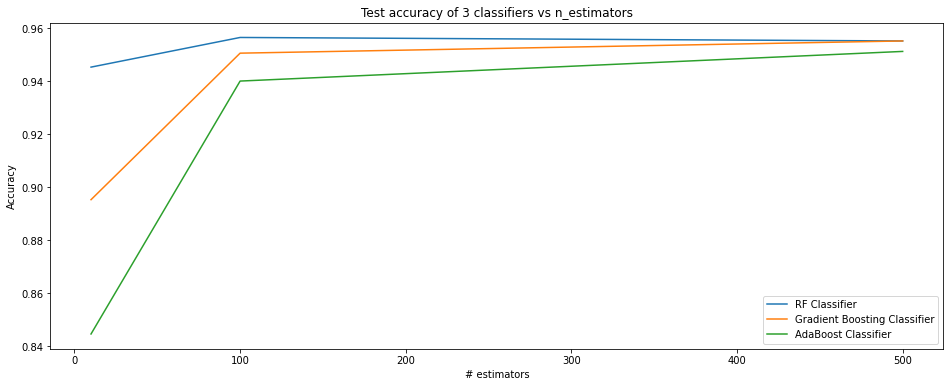

In [86]:
plt.figure(figsize=(16,6))
plt.plot(n_estimators, acc_rf, label = "RF Classifier")
plt.plot(n_estimators, acc_gbc, label = "Gradient Boosting Classifier")
plt.plot(n_estimators, acc_abc, label = "AdaBoost Classifier")
plt.xlabel("# estimators")
plt.ylabel("Accuracy")
plt.title("Test accuracy of 3 classifiers vs n_estimators")
plt.legend()
plt.show()

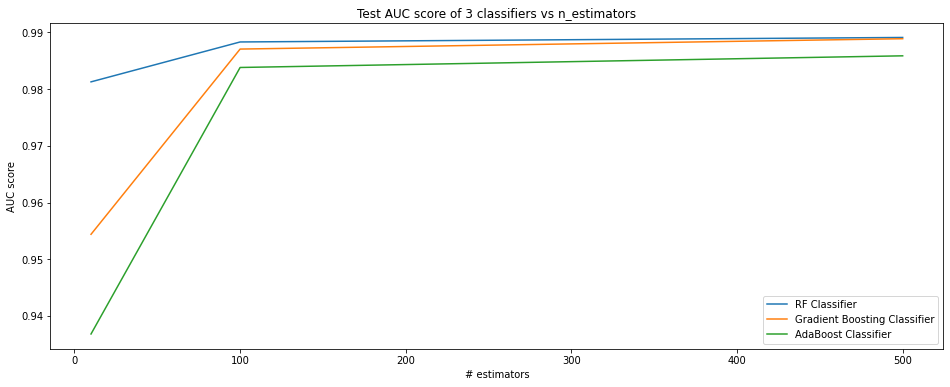

In [85]:
plt.figure(figsize=(16,6))
plt.plot(n_estimators, roc_rf, label = "RF Classifier")
plt.plot(n_estimators, roc_gbc, label = "Gradient Boosting Classifier")
plt.plot(n_estimators, roc_abc, label = "AdaBoost Classifier")
plt.xlabel("# estimators")
plt.ylabel("AUC score")
plt.title("Test AUC score of 3 classifiers vs n_estimators")
plt.legend()
plt.show()